<a href="https://colab.research.google.com/github/kunalNbadgujar/Cognizant-Artificial-Intelligence-Virtual-Internship-Project/blob/main/Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **COGNIZANT ARTIFICIAL INTELLIGENT VIRTUAL INTERNHIP**

Gala Groceries is a technology-led grocery store chain based in the USA. They rely heavily on new technologies, such as IoT to give them a competitive edge over other grocery stores. 

They pride themselves on providing the best quality, fresh produce from locally sourced suppliers. However, this comes with many challenges to consistently deliver on this objective year-round.

Gala Groceries approached Cognizant to help them with a supply chain issue. Groceries are highly perishable items. If you overstock, you are wasting money on excessive storage and waste, but if you understock, then you risk losing customers. They want to know how to better stock the items that they sell.

This is a high-level business problem and will require you to dive into the data in order to formulate some questions and recommendations to the client about what else we need in order to answer that question.

In [74]:
# importing basic libraries

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [75]:
# mount drive

from google.colab import drive

In [76]:
df = pd.read_csv('/content/drive/MyDrive/forage/cognizant/sample_sales_data.csv')

In [77]:
df

,Unnamed: 0,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card
...,...,...,...,...,...,...,...,...,...,...
7824,7824,6c19b9fc-f86d-4526-9dfe-d8027a4d13ee,2022-03-03 18:22:09,bc6187a9-d508-482b-9ca6-590d1cc7524f,cleaning products,basic,14.19,2,28.38,e-wallet
7825,7825,1c69824b-e399-4b79-a5e7-04a3a7db0681,2022-03-04 19:14:46,707e4237-191c-4cc9-85af-383a6c1cb2ab,cleaning products,standard,16.99,1,16.99,credit card
7826,7826,79aee7d6-1405-4345-9a15-92541e9e1e74,2022-03-03 14:00:09,a9325c1a-2715-41df-b7f4-3078fa5ecd97,cleaning products,basic,14.19,2,28.38,credit card
7827,7827,e5cc4f88-e5b7-4ad5-bc1b-12a828a14f55,2022-03-04 15:11:38,707e4237-191c-4cc9-85af-383a6c1cb2ab,cleaning products,basic,16.99,4,67.96,cash


In [78]:
df.shape

(7829, 10)

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7829 entries, 0 to 7828
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      7829 non-null   int64  
 1   transaction_id  7829 non-null   object 
 2   timestamp       7829 non-null   object 
 3   product_id      7829 non-null   object 
 4   category        7829 non-null   object 
 5   customer_type   7829 non-null   object 
 6   unit_price      7829 non-null   float64
 7   quantity        7829 non-null   int64  
 8   total           7829 non-null   float64
 9   payment_type    7829 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 611.8+ KB


lets view of descriptive statistics


In [80]:
df.describe()

,Unnamed: 0,unit_price,quantity,total
count,7829.000000,7829.000000,7829.000000,7829.000000
mean,3914.000000,7.819480,2.501597,19.709905
std,2260.181962,5.388088,1.122722,17.446680
min,0.000000,0.190000,1.000000,0.190000
25%,1957.000000,3.990000,1.000000,6.570000
50%,3914.000000,7.190000,3.000000,14.970000
75%,5871.000000,11.190000,4.000000,28.470000
max,7828.000000,23.990000,4.000000,95.960000


In [81]:
df.describe(include='object')

,transaction_id,timestamp,product_id,category,customer_type,payment_type
count,7829,7829,7829,7829,7829,7829
unique,7829,7738,300,22,5,4
top,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 19:32:20,ecac012c-1dec-41d4-9ebd-56fb7166f6d9,fruit,non-member,cash
freq,1,2,114,998,1601,2027


Checking for the null values 


In [82]:
df.isnull()

,Unnamed: 0,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
7824,False,False,False,False,False,False,False,False,False,False
7825,False,False,False,False,False,False,False,False,False,False
7826,False,False,False,False,False,False,False,False,False,False
7827,False,False,False,False,False,False,False,False,False,False


In [83]:
df.isnull().sum()

Unnamed: 0        0
transaction_id    0
timestamp         0
product_id        0
category          0
customer_type     0
unit_price        0
quantity          0
total             0
payment_type      0
dtype: int64

In [84]:
df.duplicated(subset='transaction_id').sum()

0

our data set not cantain any null or duplicate values 



---
now, lets see the unique values


In [85]:
print('category :- ' , df.category.unique()) 
print('\ncustomer_type :- ' , df.customer_type.unique())
print('\npayment_type :- ' , df.payment_type.unique());

category :-  ['fruit' 'vegetables' 'refrigerated items' 'frozen' 'spices and herbs'
 'canned foods' 'packaged foods' 'condiments and sauces' 'beverages'
 'dairy' 'cheese' 'meat' 'seafood' 'baked goods' 'baking' 'snacks'
 'baby products' 'pets' 'personal care' 'medicine' 'kitchen'
 'cleaning products']

customer_type :-  ['gold' 'standard' 'premium' 'basic' 'non-member']

payment_type :-  ['e-wallet' 'debit card' 'cash' 'credit card']


## **Exploratory Data Analysis** 

<ipython-input-86-8ef457d9a37d>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['unit_price'])


<Axes: xlabel='unit_price', ylabel='Density'>

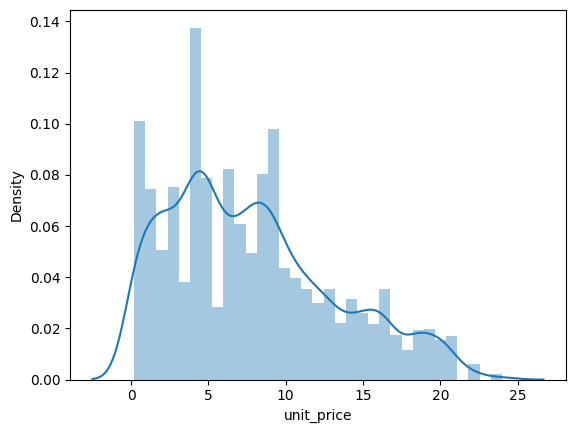

In [86]:
sns.distplot(df['unit_price'])


we see that, our unit prices are slightly right skeuwd

<ipython-input-87-72d96f557ce3>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['quantity'])


<Axes: xlabel='quantity', ylabel='Density'>

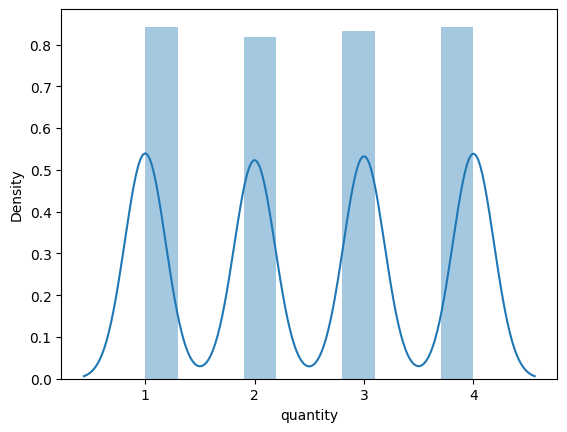

In [87]:
sns.distplot(df['quantity'])

lets check the number of category's items sells  

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]),
 [Text(0, 0, 'fruit'),
  Text(1, 0, 'vegetables'),
  Text(2, 0, 'refrigerated items'),
  Text(3, 0, 'frozen'),
  Text(4, 0, 'spices and herbs'),
  Text(5, 0, 'canned foods'),
  Text(6, 0, 'packaged foods'),
  Text(7, 0, 'condiments and sauces'),
  Text(8, 0, 'beverages'),
  Text(9, 0, 'dairy'),
  Text(10, 0, 'cheese'),
  Text(11, 0, 'meat'),
  Text(12, 0, 'seafood'),
  Text(13, 0, 'baked goods'),
  Text(14, 0, 'baking'),
  Text(15, 0, 'snacks'),
  Text(16, 0, 'baby products'),
  Text(17, 0, 'pets'),
  Text(18, 0, 'personal care'),
  Text(19, 0, 'medicine'),
  Text(20, 0, 'kitchen'),
  Text(21, 0, 'cleaning products')])

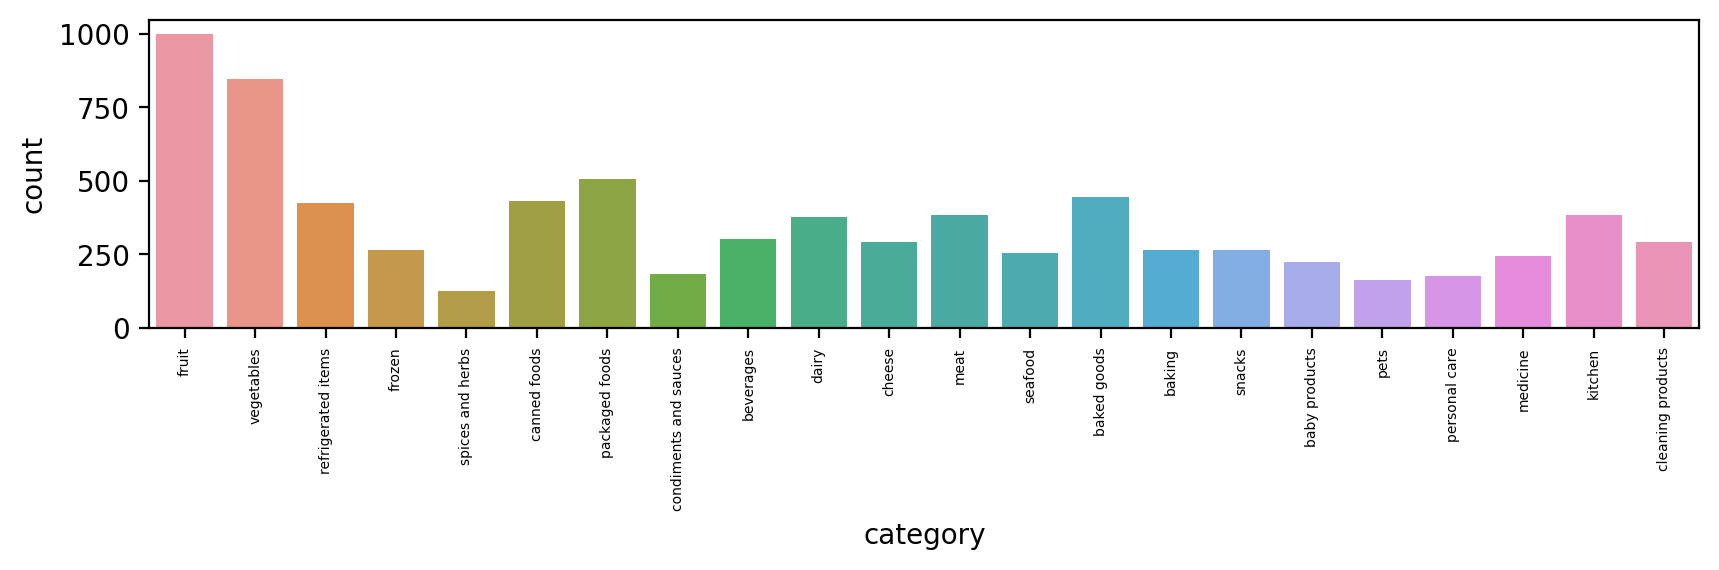

In [88]:
plt.figure(figsize=(10,2),dpi=200,)
sns.countplot(x="category", data=df)
plt.xticks(rotation=90,fontsize=5)

fruites and vegetables are most selling items,
and pets, spices and herbs are the least selling items 




---

let's check the most use payment type


(array([0, 1, 2, 3]),
 [Text(0, 0, 'e-wallet'),
  Text(1, 0, 'debit card'),
  Text(2, 0, 'cash'),
  Text(3, 0, 'credit card')])

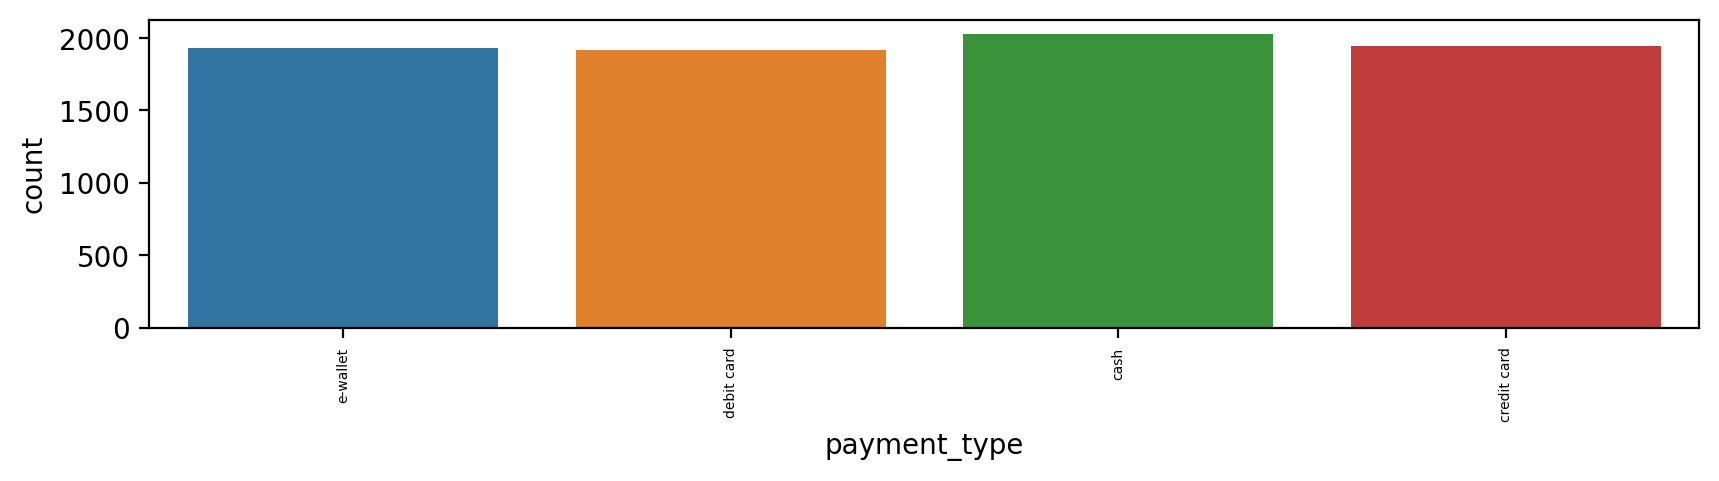

In [89]:
plt.figure(figsize=(10,2),dpi=200,)
sns.countplot(x="payment_type", data=df)
plt.xticks(rotation=90,fontsize=5)

most of the customers use cash for the payment,

lets check the customer types

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'gold'),
  Text(1, 0, 'standard'),
  Text(2, 0, 'premium'),
  Text(3, 0, 'basic'),
  Text(4, 0, 'non-member')])

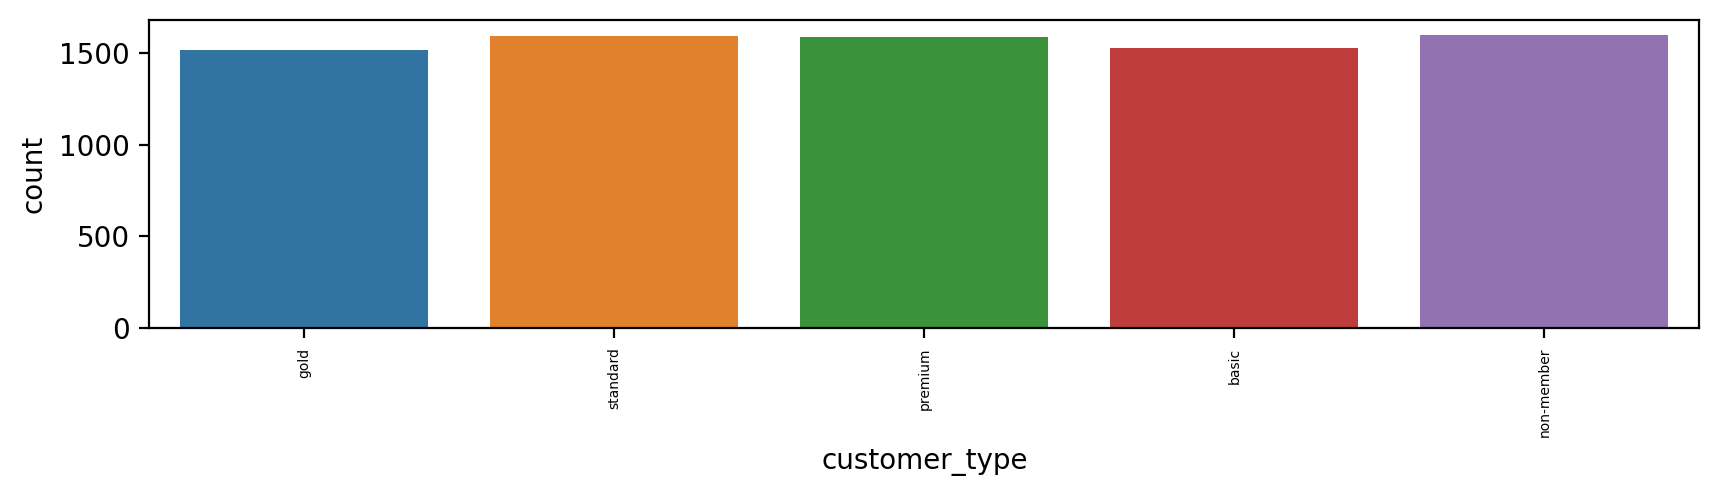

In [90]:
plt.figure(figsize=(10,2),dpi=200,)
sns.countplot(x="customer_type", data=df)
plt.xticks(rotation=90,fontsize=5)

most of the customers are standard and non member


---



(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'gold'),
  Text(1, 0, 'standard'),
  Text(2, 0, 'premium'),
  Text(3, 0, 'basic'),
  Text(4, 0, 'non-member')])

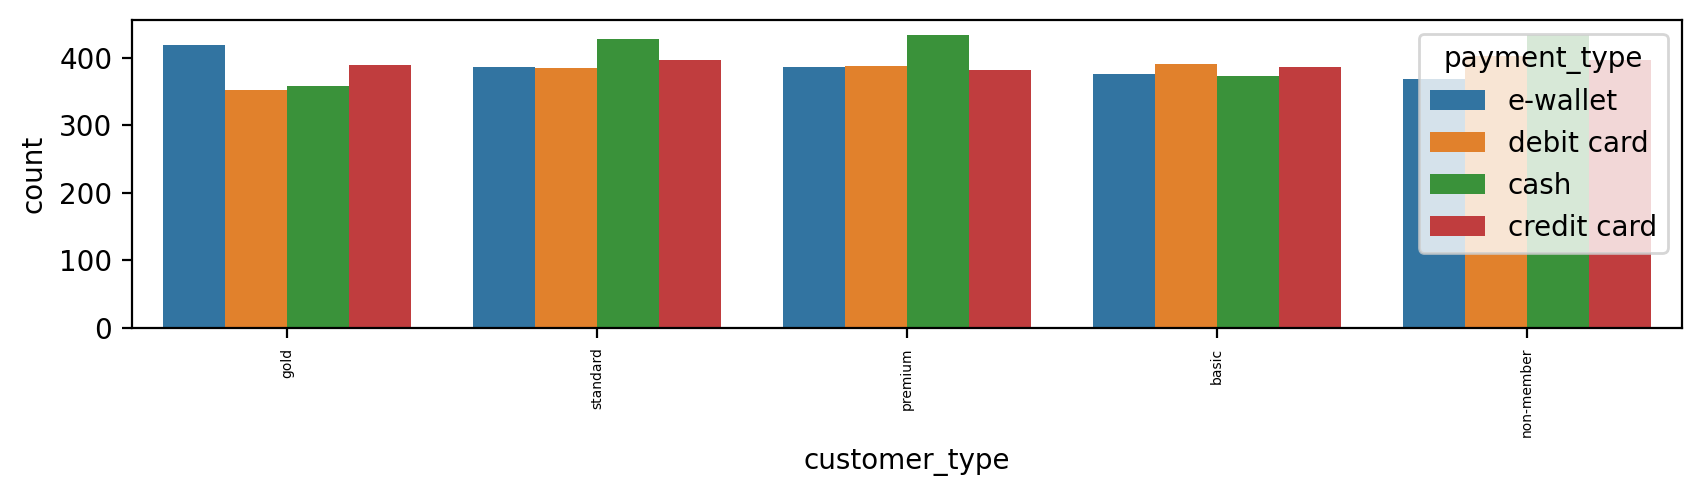

In [91]:
plt.figure(figsize=(10,2),dpi=200,)
sns.countplot(x="customer_type",hue="payment_type", data=df)
plt.xticks(rotation=90,fontsize=5)

the customer who are non member are use cash for the payment, in the other hand customer of the gold category use E - wallet as payment method



---

Now, lets check the prices of the category


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]),
 [Text(0, 0, 'fruit'),
  Text(1, 0, 'vegetables'),
  Text(2, 0, 'refrigerated items'),
  Text(3, 0, 'frozen'),
  Text(4, 0, 'spices and herbs'),
  Text(5, 0, 'canned foods'),
  Text(6, 0, 'packaged foods'),
  Text(7, 0, 'condiments and sauces'),
  Text(8, 0, 'beverages'),
  Text(9, 0, 'dairy'),
  Text(10, 0, 'cheese'),
  Text(11, 0, 'meat'),
  Text(12, 0, 'seafood'),
  Text(13, 0, 'baked goods'),
  Text(14, 0, 'baking'),
  Text(15, 0, 'snacks'),
  Text(16, 0, 'baby products'),
  Text(17, 0, 'pets'),
  Text(18, 0, 'personal care'),
  Text(19, 0, 'medicine'),
  Text(20, 0, 'kitchen'),
  Text(21, 0, 'cleaning products')])

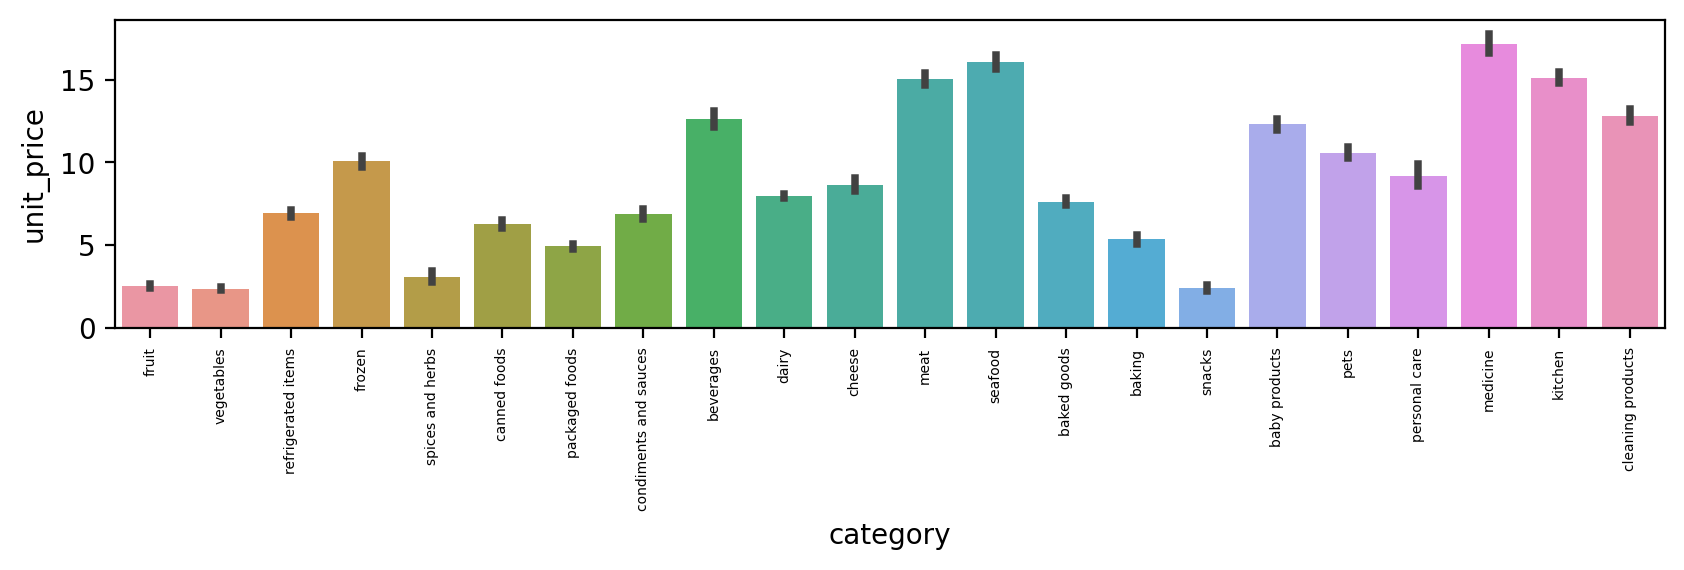

In [92]:
plt.figure(figsize=(10,2),dpi=200,)
sns.barplot(x="category",y="unit_price", data=df)
plt.xticks(rotation=90,fontsize=5)

fruits and vegetables have least prices, and medecine have highest price 

In [93]:
  corr = df.corr()
  corr.style.background_gradient(cmap='coolwarm')
  

<ipython-input-93-2cae9f9a3223>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


,Unnamed: 0,unit_price,quantity,total
Unnamed: 0,1.000000,0.623392,0.003927,0.483878
unit_price,0.623392,1.000000,0.024588,0.792018
quantity,0.003927,0.024588,1.000000,0.521926
total,0.483878,0.792018,0.521926,1.000000


In [94]:
df1 = df.drop(['Unnamed: 0'],axis=1)


In [95]:
  corr = df1.corr()
  corr.style.background_gradient(cmap='coolwarm')

<ipython-input-95-2a42d00be680>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df1.corr()


,unit_price,quantity,total
unit_price,1.000000,0.024588,0.792018
quantity,0.024588,1.000000,0.521926
total,0.792018,0.521926,1.000000


## Now from the above we can **conclude** that, 


1.   Fruit & vegetables are the 2 most frequently bought product categories 

2.   Non-members are the most frequent buyers within the store

3.   Cash is the most frequently used payment method 

## but,

**the client indicated that they wanted to know the following: “How to better stock the items that they sell".**

1.   This is a very broad statement and in order to tackle this with better accuracy, we need to identify a specific problem statement that the business would like to solve. For example, can we predict the demand of products on an hourly basis in order to procure products more intelligently?
2.    We need more data. The current sample only covers 7 days and 1 store. 
3.    Based on the problem statement that we move forward with, we will need more datasets to help describe the outcome that we’re trying to model. For example, if we’re modeling demand for products, we may want to include information about stock levels or weather conditions. 





---



Now, The client has agreed to share more data in the form of sensor data. They use sensors to measure temperature storage facilities where products are stored in the warehouse, and they also use stock levels within the refrigerators and freezers in store. 



---
**Our Plan,**

1. Data Modelling          : -     all the data in the three tables are used.

2. Data Preparation :- Use the data model to merge the data, then clean the data and remove any outliers 

3. Feature Engineering : - Create new features and transform the data set ready for the predecting the modelling 

4. Model Experimentation : - Testing algorithms with cross-validation 

5. Evalution of results : - measuring performance matrics 

6. Developement of the production Algorithms : - Productionising the algorithm as an API

7. QA devOps : -  to ensure the model is performimg as expected and to integrate the model.



In [96]:
sales = pd.read_csv('/content/drive/MyDrive/forage/cognizant/sales.csv')


In [97]:
stock  = pd.read_csv('/content/drive/MyDrive/forage/cognizant/sensor_stock_levels.csv')


In [98]:
temperature = pd.read_csv('/content/drive/MyDrive/forage/cognizant/sensor_storage_temperature.csv')


In [99]:
sales.head()

,Unnamed: 0,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card


In [100]:
stock.head()

,Unnamed: 0,id,timestamp,product_id,estimated_stock_pct
0,0,4220e505-c247-478d-9831-6b9f87a4488a,2022-03-07 12:13:02,f658605e-75f3-4fed-a655-c0903f344427,0.75
1,1,f2612b26-fc82-49ea-8940-0751fdd4d9ef,2022-03-07 16:39:46,de06083a-f5c0-451d-b2f4-9ab88b52609d,0.48
2,2,989a287f-67e6-4478-aa49-c3a35dac0e2e,2022-03-01 18:17:43,ce8f3a04-d1a4-43b1-a7c2-fa1b8e7674c8,0.58
3,3,af8e5683-d247-46ac-9909-1a77bdebefb2,2022-03-02 14:29:09,c21e3ba9-92a3-4745-92c2-6faef73223f7,0.79
4,4,08a32247-3f44-4002-85fb-c198434dd4bb,2022-03-02 13:46:18,7f478817-aa5b-44e9-9059-8045228c9eb0,0.22


In [101]:
temperature.head()

,Unnamed: 0,id,timestamp,temperature
0,0,d1ca1ef8-0eac-42fc-af80-97106efc7b13,2022-03-07 15:55:20,2.96
1,1,4b8a66c4-0f3a-4f16-826f-8cf9397e9d18,2022-03-01 09:18:22,1.88
2,2,3d47a0c7-1e72-4512-812f-b6b5d8428cf3,2022-03-04 15:12:26,1.78
3,3,9500357b-ce15-424a-837a-7677b386f471,2022-03-02 12:30:42,2.18
4,4,c4b61fec-99c2-4c6d-8e5d-4edd8c9632fa,2022-03-05 09:09:33,1.38


In [102]:
sales.drop(["Unnamed: 0"], axis=1,inplace= True)
stock.drop(["Unnamed: 0"], axis=1,inplace= True)
temperature.drop(["Unnamed: 0"], axis=1,inplace= True)

In [103]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7829 entries, 0 to 7828
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   transaction_id  7829 non-null   object 
 1   timestamp       7829 non-null   object 
 2   product_id      7829 non-null   object 
 3   category        7829 non-null   object 
 4   customer_type   7829 non-null   object 
 5   unit_price      7829 non-null   float64
 6   quantity        7829 non-null   int64  
 7   total           7829 non-null   float64
 8   payment_type    7829 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 550.6+ KB


In [104]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   15000 non-null  object 
 1   timestamp            15000 non-null  object 
 2   product_id           15000 non-null  object 
 3   estimated_stock_pct  15000 non-null  float64
dtypes: float64(1), object(3)
memory usage: 468.9+ KB


In [105]:
temperature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23890 entries, 0 to 23889
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           23890 non-null  object 
 1   timestamp    23890 non-null  object 
 2   temperature  23890 non-null  float64
dtypes: float64(1), object(2)
memory usage: 560.0+ KB


In [106]:
import datetime as dt

In [107]:
sales["timestamp"] = sales["timestamp"].apply(lambda x: dt.datetime.strptime(x,'%Y-%m-%d %H:%M:%S')) 

In [108]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7829 entries, 0 to 7828
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  7829 non-null   object        
 1   timestamp       7829 non-null   datetime64[ns]
 2   product_id      7829 non-null   object        
 3   category        7829 non-null   object        
 4   customer_type   7829 non-null   object        
 5   unit_price      7829 non-null   float64       
 6   quantity        7829 non-null   int64         
 7   total           7829 non-null   float64       
 8   payment_type    7829 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 550.6+ KB


In [109]:
stock["timestamp"] = temperature["timestamp"].apply(lambda x: dt.datetime.strptime(x,'%Y-%m-%d %H:%M:%S')) 

In [110]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   15000 non-null  object        
 1   timestamp            15000 non-null  datetime64[ns]
 2   product_id           15000 non-null  object        
 3   estimated_stock_pct  15000 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 468.9+ KB


In [111]:
temperature["timestamp"] = temperature["timestamp"].apply(lambda x: dt.datetime.strptime(x,'%Y-%m-%d %H:%M:%S')) 

In [112]:
temperature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23890 entries, 0 to 23889
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           23890 non-null  object        
 1   timestamp    23890 non-null  datetime64[ns]
 2   temperature  23890 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 560.0+ KB


In [113]:
sales.head(
)

,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card


This looks much better!

---



Currently we have 3 datasets. In order to include all of this data within a predictive model, we need to merge them together into 1 dataframe. 

If we revisit the problem statement: 

```
“Can we accurately predict the stock levels of products, based on sales data and sensor data, 
on an hourly basis in order to more intelligently procure products from our suppliers.”
```

The client indicates that they want the model to predict on an hourly basis. Looking at the data model, we can see that only column that we can use to merge the 3 datasets together is `timestamp`.

So, we must first transform the `timestamp` column in all 3 datasets to be based on the hour of the day, then we can merge the datasets together.

In [114]:
from datetime import datetime
def convert_timestamp_to_hourly(data: pd.DataFrame = None, column: str = None):
  dummy = data.copy()
  new_ts = dummy[column].tolist()
  new_ts = [i.strftime('%Y-%m-%d %H:00:00') for i in new_ts]
  new_ts = [datetime.strptime(i, '%Y-%m-%d %H:00:00') for i in new_ts]
  dummy[column] = new_ts
  return dummy

In [115]:
sales = convert_timestamp_to_hourly(sales, 'timestamp')
sales.head()

,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:00:00,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:00:00,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:00:00,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:00:00,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:00:00,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card


In [116]:
stock = convert_timestamp_to_hourly(stock, 'timestamp')
stock.head()

,id,timestamp,product_id,estimated_stock_pct
0,4220e505-c247-478d-9831-6b9f87a4488a,2022-03-07 15:00:00,f658605e-75f3-4fed-a655-c0903f344427,0.75
1,f2612b26-fc82-49ea-8940-0751fdd4d9ef,2022-03-01 09:00:00,de06083a-f5c0-451d-b2f4-9ab88b52609d,0.48
2,989a287f-67e6-4478-aa49-c3a35dac0e2e,2022-03-04 15:00:00,ce8f3a04-d1a4-43b1-a7c2-fa1b8e7674c8,0.58
3,af8e5683-d247-46ac-9909-1a77bdebefb2,2022-03-02 12:00:00,c21e3ba9-92a3-4745-92c2-6faef73223f7,0.79
4,08a32247-3f44-4002-85fb-c198434dd4bb,2022-03-05 09:00:00,7f478817-aa5b-44e9-9059-8045228c9eb0,0.22


In [117]:
temperature = convert_timestamp_to_hourly(temperature, 'timestamp')
temperature.head()

,id,timestamp,temperature
0,d1ca1ef8-0eac-42fc-af80-97106efc7b13,2022-03-07 15:00:00,2.96
1,4b8a66c4-0f3a-4f16-826f-8cf9397e9d18,2022-03-01 09:00:00,1.88
2,3d47a0c7-1e72-4512-812f-b6b5d8428cf3,2022-03-04 15:00:00,1.78
3,9500357b-ce15-424a-837a-7677b386f471,2022-03-02 12:00:00,2.18
4,c4b61fec-99c2-4c6d-8e5d-4edd8c9632fa,2022-03-05 09:00:00,1.38


Now we can see all of the `timestamp` columns have had the minutes and seconds reduced to `00`. The next thing to do, is to aggregate the datasets in order to combine rows which have the same value for `timestamp`.

For the `sales` data, we want to group the data by `timestamp` but also by `product_id`. When we aggregate, we must choose which columns to aggregate by the grouping. For now, let's aggregate quantity.

In [118]:
sales_agg = sales.groupby(['timestamp', 'product_id']).agg({'quantity': 'sum'}).reset_index()
sales_agg.head()

,timestamp,product_id,quantity
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,3
1,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,3
2,2022-03-01 09:00:00,03a2557a-aa12-4add-a6d4-77dc36342067,3
3,2022-03-01 09:00:00,049b2171-0eeb-4a3e-bf98-0c290c7821da,7
4,2022-03-01 09:00:00,04da844d-8dba-4470-9119-e534d52a03a0,11


We now have an aggregated sales data where each row represents a unique combination of hour during which the sales took place from that weeks worth of data and the product_id. We summed the quantity and we took the mean average of the unit_price.

For the stock data, we want to group it in the same way and aggregate the `estimated_stock_pct`.

In [119]:
stock_agg = stock.groupby(['timestamp', 'product_id']).agg({'estimated_stock_pct': 'mean'}).reset_index()
stock_agg.head()

,timestamp,product_id,estimated_stock_pct
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.310
1,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.700
2,2022-03-01 09:00:00,01ff0803-ae73-4234-971d-5713c97b7f4b,0.480
3,2022-03-01 09:00:00,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.710
4,2022-03-01 09:00:00,049b2171-0eeb-4a3e-bf98-0c290c7821da,0.115


This shows us the average stock percentage of each product at unique hours within the week of sample data.

Finally, for the temperature data, product_id does not exist in this table, so we simply need to group by timestamp and aggregate the `temperature`.

In [122]:
temp_agg = temperature.groupby(['timestamp']).agg({'temperature': 'mean'}).reset_index()
temp_agg.head()

,timestamp,temperature
0,2022-03-01 09:00:00,-0.028850
1,2022-03-01 10:00:00,1.284314
2,2022-03-01 11:00:00,-0.560000
3,2022-03-01 12:00:00,-0.537721
4,2022-03-01 13:00:00,-0.188734


This gives us the average temperature of the storage facility where the produce is stored in the warehouse by unique hours during the week. Now, we are ready to merge our data. We will use the `stock_agg` table as our base table, and we will merge our other 2 tables onto this.

In [123]:
merged_df = stock_agg.merge(sales_agg, on=['timestamp', 'product_id'], how='left')
merged_df.head()

,timestamp,product_id,estimated_stock_pct,quantity
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.310,3.0
1,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.700,3.0
2,2022-03-01 09:00:00,01ff0803-ae73-4234-971d-5713c97b7f4b,0.480,NaN
3,2022-03-01 09:00:00,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.710,NaN
4,2022-03-01 09:00:00,049b2171-0eeb-4a3e-bf98-0c290c7821da,0.115,7.0


In [124]:
merged_df = merged_df.merge(temp_agg, on='timestamp', how='left')
merged_df.head()

,timestamp,product_id,estimated_stock_pct,quantity,temperature
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.310,3.0,-0.02885
1,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.700,3.0,-0.02885
2,2022-03-01 09:00:00,01ff0803-ae73-4234-971d-5713c97b7f4b,0.480,NaN,-0.02885
3,2022-03-01 09:00:00,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.710,NaN,-0.02885
4,2022-03-01 09:00:00,049b2171-0eeb-4a3e-bf98-0c290c7821da,0.115,7.0,-0.02885


In [125]:
merged_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10904 entries, 0 to 10903
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   timestamp            10904 non-null  datetime64[ns]
 1   product_id           10904 non-null  object        
 2   estimated_stock_pct  10904 non-null  float64       
 3   quantity             3094 non-null   float64       
 4   temperature          10904 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 511.1+ KB


We can see from the `.info()` method that we have some null values. These need to be treated before we can build a predictive model. The column that features some null values is `quantity`. We can assume that if there is a null value for this column, it represents that there were 0 sales of this product within this hour. So, lets fill this columns null values with 0, however, we should verify this with the client, in order to make sure we're not making any assumptions by filling these null values with 0.

In [126]:
merged_df['quantity'] = merged_df['quantity'].fillna(0)
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10904 entries, 0 to 10903
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   timestamp            10904 non-null  datetime64[ns]
 1   product_id           10904 non-null  object        
 2   estimated_stock_pct  10904 non-null  float64       
 3   quantity             10904 non-null  float64       
 4   temperature          10904 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 511.1+ KB


We can combine some more features onto this table too, including `category` and `unit_price`.

In [129]:
product_categories = sales[['product_id', 'category']]
product_categories = product_categories.drop_duplicates()

product_price = sales[['product_id', 'unit_price']]
product_price = product_price.drop_duplicates()

In [130]:
merged_df = merged_df.merge(product_categories, on="product_id", how="left")
merged_df.head()

,timestamp,product_id,estimated_stock_pct,quantity,temperature,category
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.310,3.0,-0.02885,kitchen
1,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.700,3.0,-0.02885,vegetables
2,2022-03-01 09:00:00,01ff0803-ae73-4234-971d-5713c97b7f4b,0.480,0.0,-0.02885,baby products
3,2022-03-01 09:00:00,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.710,0.0,-0.02885,pets
4,2022-03-01 09:00:00,049b2171-0eeb-4a3e-bf98-0c290c7821da,0.115,7.0,-0.02885,canned foods


In [131]:
merged_df = merged_df.merge(product_price, on="product_id", how="left")
merged_df.head()

,timestamp,product_id,estimated_stock_pct,quantity,temperature,category,unit_price
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.310,3.0,-0.02885,kitchen,11.19
1,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.700,3.0,-0.02885,vegetables,1.49
2,2022-03-01 09:00:00,01ff0803-ae73-4234-971d-5713c97b7f4b,0.480,0.0,-0.02885,baby products,14.19
3,2022-03-01 09:00:00,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.710,0.0,-0.02885,pets,8.19
4,2022-03-01 09:00:00,049b2171-0eeb-4a3e-bf98-0c290c7821da,0.115,7.0,-0.02885,canned foods,2.49


In [132]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10904 entries, 0 to 10903
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   timestamp            10904 non-null  datetime64[ns]
 1   product_id           10904 non-null  object        
 2   estimated_stock_pct  10904 non-null  float64       
 3   quantity             10904 non-null  float64       
 4   temperature          10904 non-null  float64       
 5   category             10904 non-null  object        
 6   unit_price           10904 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 681.5+ KB


Now we have our table with 2 extra features!

---


We have our cleaned and merged data. Now we must transform this data so that the columns are in a suitable format for a machine learning model. In other terms, every column must be numeric. There are some models that will accept categorical features, but for this exercise we will use a model that requires numeric features.

Let's first engineer the `timestamp` column. In it's current form, it is not very useful for a machine learning model. Since it's a datetime datatype, we can explode this column into day of week, day of month and hour to name a few.

In [133]:
merged_df['timestamp_day_of_month'] = merged_df['timestamp'].dt.day
merged_df['timestamp_day_of_week'] = merged_df['timestamp'].dt.dayofweek
merged_df['timestamp_hour'] = merged_df['timestamp'].dt.hour
merged_df.drop(columns=['timestamp'], inplace=True)
merged_df.head()

,product_id,estimated_stock_pct,quantity,temperature,category,unit_price,timestamp_day_of_month,timestamp_day_of_week,timestamp_hour
0,00e120bb-89d6-4df5-bc48-a051148e3d03,0.310,3.0,-0.02885,kitchen,11.19,1,1,9
1,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.700,3.0,-0.02885,vegetables,1.49,1,1,9
2,01ff0803-ae73-4234-971d-5713c97b7f4b,0.480,0.0,-0.02885,baby products,14.19,1,1,9
3,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.710,0.0,-0.02885,pets,8.19,1,1,9
4,049b2171-0eeb-4a3e-bf98-0c290c7821da,0.115,7.0,-0.02885,canned foods,2.49,1,1,9


The next column that we can engineer is the `category` column. In its current form it is categorical. We can convert it into numeric by creating dummy variables from this categorical column.

A dummy variable is a binary flag column (1's and 0's) that indicates whether a row fits a particular value of that column. For example, we can create a dummy column called category_pets, which will contain a 1 if that row indicates a product which was included within this category and a 0 if not.

In [134]:
merged_df = pd.get_dummies(merged_df, columns=['category'])
merged_df.head()

,product_id,estimated_stock_pct,quantity,temperature,unit_price,timestamp_day_of_month,timestamp_day_of_week,timestamp_hour,category_baby products,category_baked goods,...,category_meat,category_medicine,category_packaged foods,category_personal care,category_pets,category_refrigerated items,category_seafood,category_snacks,category_spices and herbs,category_vegetables
0,00e120bb-89d6-4df5-bc48-a051148e3d03,0.310,3.0,-0.02885,11.19,1,1,9,0,0,...,0,0,0,0,0,0,0,0,0,0
1,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.700,3.0,-0.02885,1.49,1,1,9,0,0,...,0,0,0,0,0,0,0,0,0,1
2,01ff0803-ae73-4234-971d-5713c97b7f4b,0.480,0.0,-0.02885,14.19,1,1,9,1,0,...,0,0,0,0,0,0,0,0,0,0
3,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.710,0.0,-0.02885,8.19,1,1,9,0,0,...,0,0,0,0,1,0,0,0,0,0
4,049b2171-0eeb-4a3e-bf98-0c290c7821da,0.115,7.0,-0.02885,2.49,1,1,9,0,0,...,0,0,0,0,0,0,0,0,0,0


In [135]:
merged_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10904 entries, 0 to 10903
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   product_id                      10904 non-null  object 
 1   estimated_stock_pct             10904 non-null  float64
 2   quantity                        10904 non-null  float64
 3   temperature                     10904 non-null  float64
 4   unit_price                      10904 non-null  float64
 5   timestamp_day_of_month          10904 non-null  int64  
 6   timestamp_day_of_week           10904 non-null  int64  
 7   timestamp_hour                  10904 non-null  int64  
 8   category_baby products          10904 non-null  uint8  
 9   category_baked goods            10904 non-null  uint8  
 10  category_baking                 10904 non-null  uint8  
 11  category_beverages              10904 non-null  uint8  
 12  category_canned foods           

In [136]:
merged_df.drop(columns=['product_id'], inplace=True)
merged_df.head()

,estimated_stock_pct,quantity,temperature,unit_price,timestamp_day_of_month,timestamp_day_of_week,timestamp_hour,category_baby products,category_baked goods,category_baking,...,category_meat,category_medicine,category_packaged foods,category_personal care,category_pets,category_refrigerated items,category_seafood,category_snacks,category_spices and herbs,category_vegetables
0,0.310,3.0,-0.02885,11.19,1,1,9,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.700,3.0,-0.02885,1.49,1,1,9,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0.480,0.0,-0.02885,14.19,1,1,9,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.710,0.0,-0.02885,8.19,1,1,9,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0.115,7.0,-0.02885,2.49,1,1,9,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Now it is time to train a machine learning model. We will use a supervised machine learning model, and we will use `estimated_stock_pct` as the target variable, since the problem statement was focused on being able to predict the stock levels of products on an hourly basis.

Whilst training the machine learning model, we will use cross-validation, which is a technique where we hold back a portion of the dataset for testing in order to compute how well the trained machine learning model is able to predict the target variable.

Finally, to ensure that the trained machine learning model is able to perform robustly, we will want to test it several times on random samples of data, not just once. Hence, we will use a `K-fold` strategy to train the machine learning model on `K` (K is an integer to be decided) random samples of the data.

First, let's create our target variable `y` and independent variables `X`

In [137]:
X = merged_df.drop(columns=['estimated_stock_pct'])
y = merged_df['estimated_stock_pct']
print(X.shape)
print(y.shape)

(10904, 28)
(10904,)


In [138]:
K = 10
split = 0.75

For this exercise, we are going to use a `RandomForestRegressor` model, which is an instance of a Random Forest. These are powerful tree based ensemble algorithms and are particularly good because their results are very interpretable.

We are using a `regression` algorithm here because we are predicting a continuous numeric variable, that is, `estimated_stock_pct`. A `classification` algorithm would be suitable for scenarios where you're predicted a binary outcome, e.g. True/False.

We are going to use a package called `scikit-learn` for the machine learning algorithm, so first we must install and import this, along with some other functions and classes that can help with the evaluation of the model.

In [139]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler

And now let's create a loop to train `K` models with a 75/25% random split of the data each time between training and test samples

In [140]:
accuracy = []

for fold in range(0, K):

  # Instantiate algorithm
  model = RandomForestRegressor()
  scaler = StandardScaler()

  # Create training and test samples
  X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=split, random_state=42)

  # Scale X data, we scale the data because it helps the algorithm to converge
  # and helps the algorithm to not be greedy with large values
  scaler.fit(X_train)
  X_train = scaler.transform(X_train)
  X_test = scaler.transform(X_test)

  # Train model
  trained_model = model.fit(X_train, y_train)

  # Generate predictions on test sample
  y_pred = trained_model.predict(X_test)

  # Compute accuracy, using mean absolute error
  mae = mean_absolute_error(y_true=y_test, y_pred=y_pred)
  accuracy.append(mae)
  print(f"Fold {fold + 1}: MAE = {mae:.3f}")

print(f"Average MAE: {(sum(accuracy) / len(accuracy)):.2f}")


Fold 1: MAE = 0.237
Fold 2: MAE = 0.237
Fold 3: MAE = 0.236
Fold 4: MAE = 0.238
Fold 5: MAE = 0.236
Fold 6: MAE = 0.236
Fold 7: MAE = 0.236
Fold 8: MAE = 0.237
Fold 9: MAE = 0.237
Fold 10: MAE = 0.237
Average MAE: 0.24
